In [9]:
# We import the libraries we will need
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline
from JSAnimation.IPython_display import display_animation
import matplotlib.animation as anim

In [86]:
# We define the relation function
def f_u(u, gamma = 1.4):
    f_u = npy.empty(u.shape)

    f_u[:,0] = u[:,1]
    f_u[:,1] = (u[:,1]**2)/u[:,0] + (gamma - 1)*(u[:,2] - 0.5*((u[:,1]**2)/u[:,0]))
    f_u[:,2] = (u[:,2] + (gamma - 1)*(u[:,2] - 0.5*((u[:,1]**2)/u[:,0])))*(u[:,1]/u[:,0])

    return f_u

# Simulation conditions
dx = .25
nx = 81

dt = .0002
t_to_sim = .01
nt = int(t_to_sim/dt)

In [87]:
# Initial conditions
ICL = npy.array([1, 0, 100000])
ICR = npy.array([.125, 0, 10000])

u = npy.empty((nt, nx,3))
u[0, 0:40, 0] = ICL[0]
u[0, 40:81, 0] = ICR[0]
u[0, 0:40, 1] = ICL[0]*ICL[1]
u[0, 40:81, 1] = ICR[0]*ICR[1]
u[0, 0:40, 2] =  ICL[2]/(1.4 - 1) + 0.5*ICL[0]*ICL[1]**2
u[0, 40:81, 2] = ICR[2]/(1.4 - 1) + 0.5*ICR[0]*ICR[1]**2

In [90]:
# Solve function
def solve(u, f, dt, dx, nt):
    unh = u[0].copy()

    for n in range(1, nt):
        un = u[n-1].copy()
        Fn = f(un)

        # Predictor
        unh[:-1] = 0.5*(un[1:]+un[:-1]) - 0.5*dt/dx*(Fn[1:]-Fn[:-1])
        Fnh = f(unh)

        # Corrector
        u[n, 1:] = un[1:] - dt/dx*(Fnh[1:]-Fnh[:-1])
        u[n, 0] = u[0, 0]

    return u

u = solve(u, f_u, dt, dx, nt)
u_out_2_5 = u[nt-1, 50, :]

print(u_out_2_5)
u_out_2_5 = [0.375, 109.639, 91668.04]

print("Density : ", u_out_2_5[0])
print("Velocity : ", u_out_2_5[1]/u_out_2_5[0])
print("Pressure : ", (u_out_2_5[2] - 0.5*(u_out_2_5[1]/u_out_2_5[0])**2)*(1.4 - 1))

[  3.64107360e-01   1.06509164e+02   9.11785825e+04]
Density :  0.375
Velocity :  292.37066666666664
Pressure :  19571.094654577773



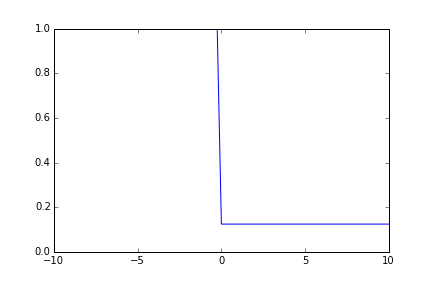
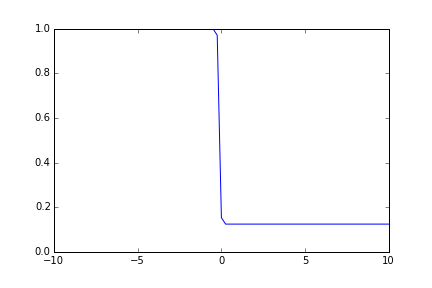
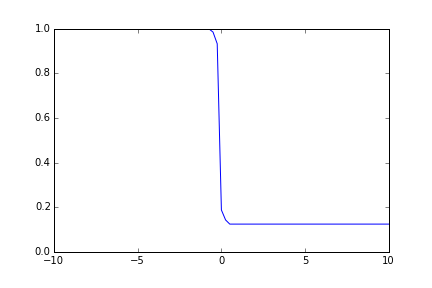
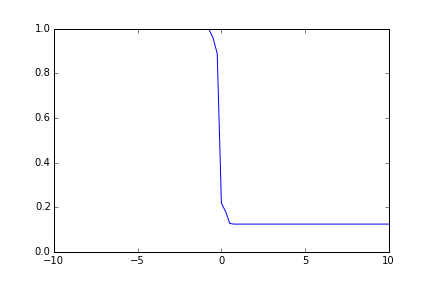
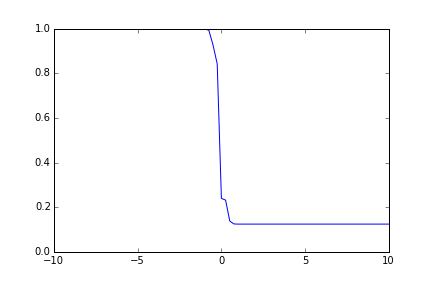
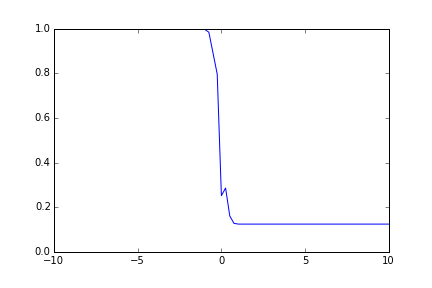
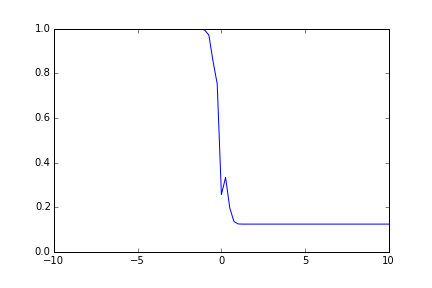
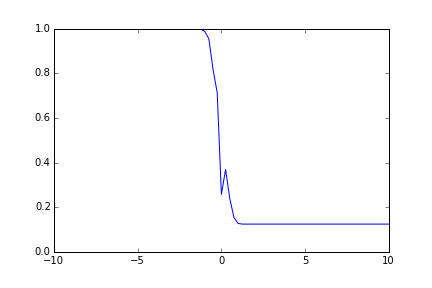
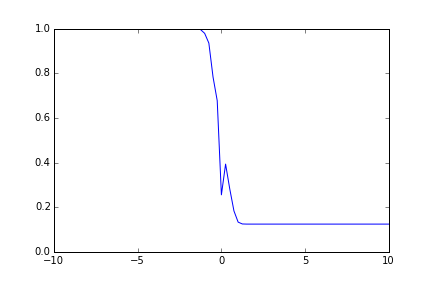
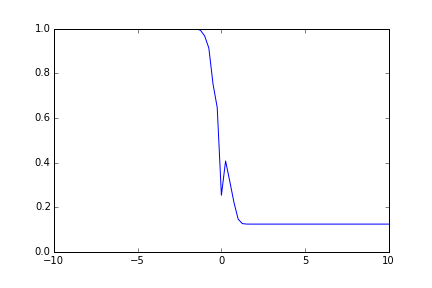
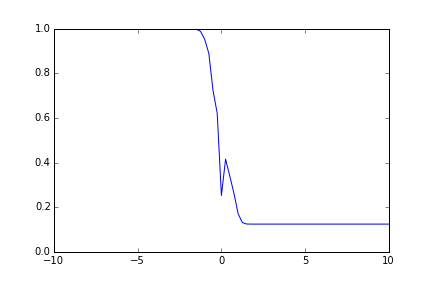
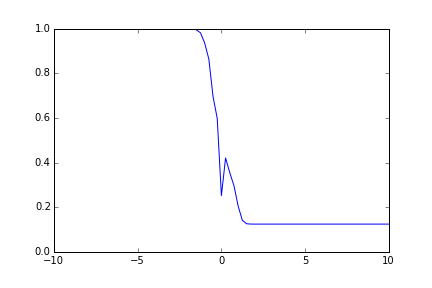
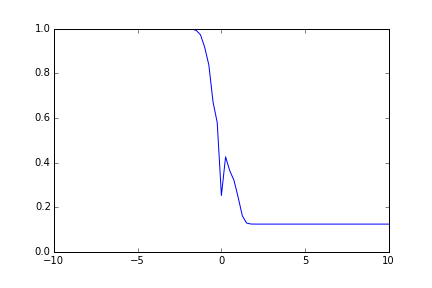
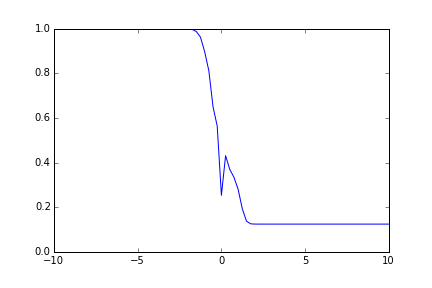
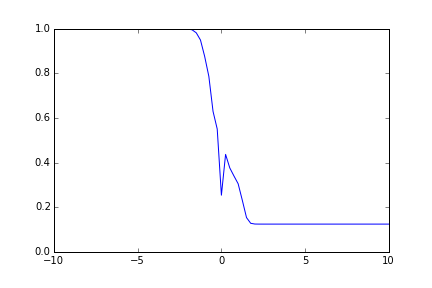
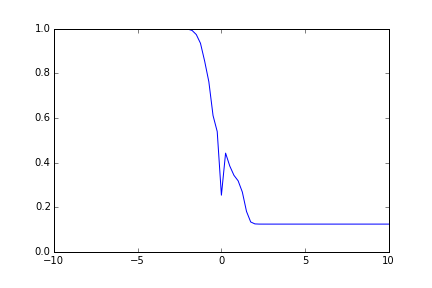
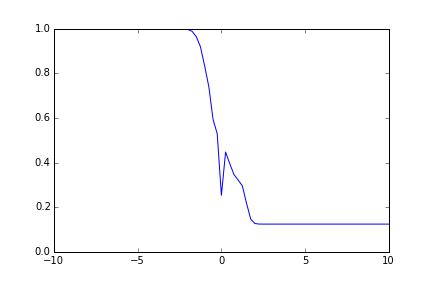
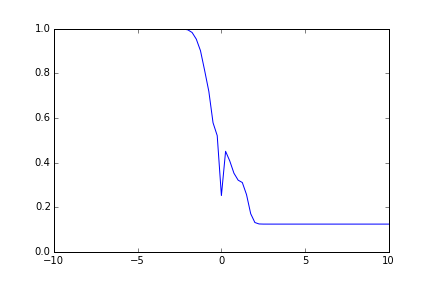
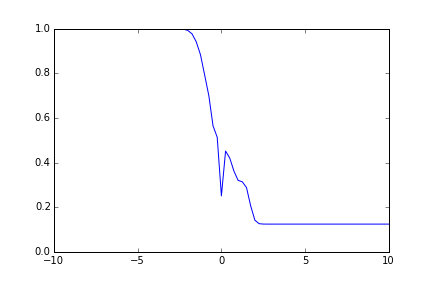
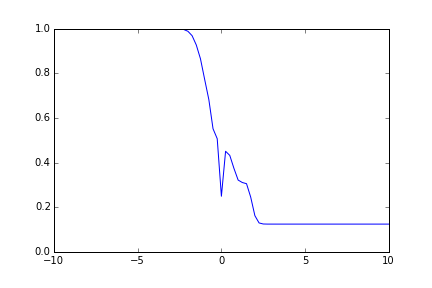
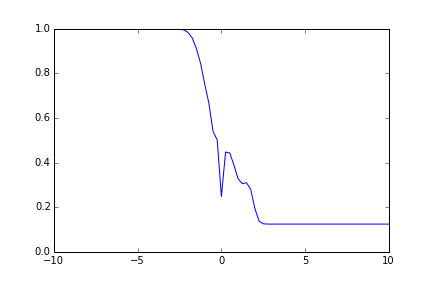
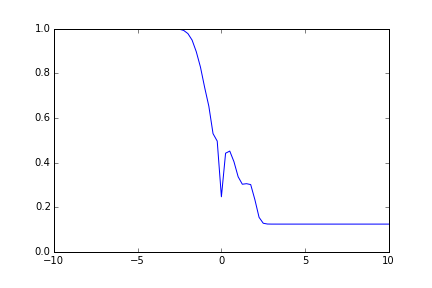
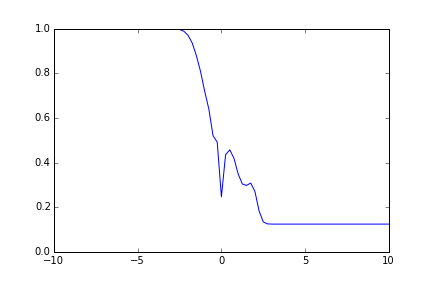
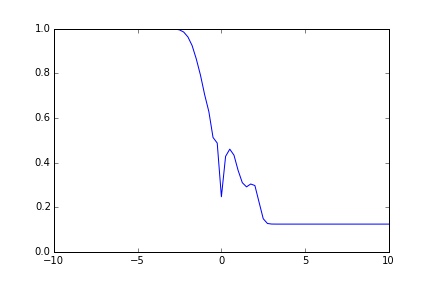
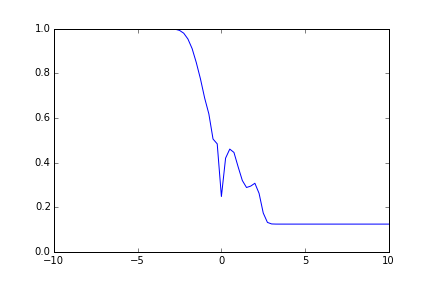
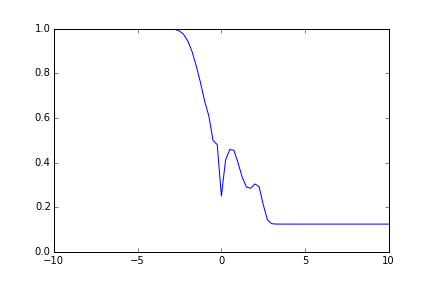
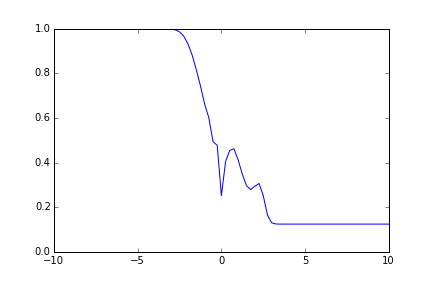
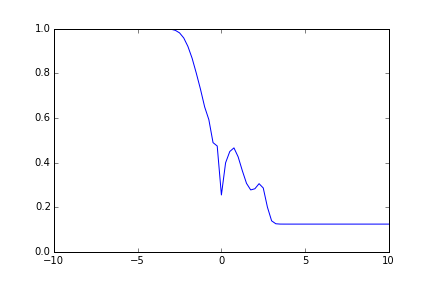
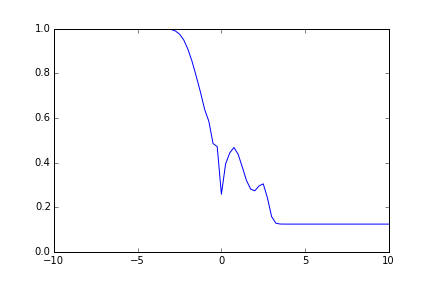
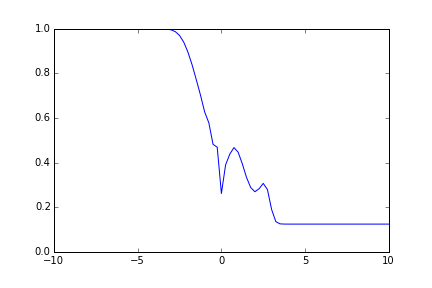
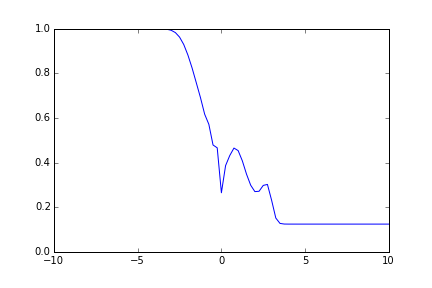
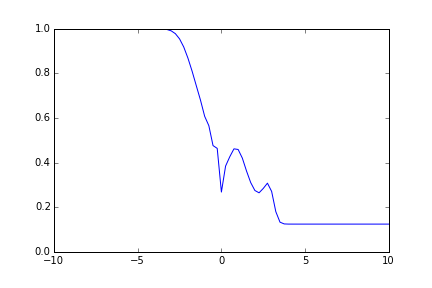
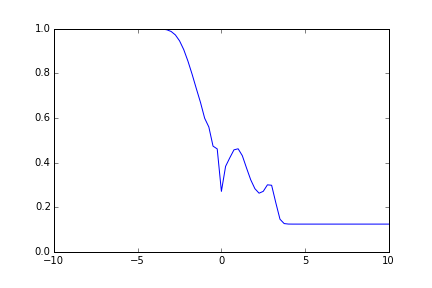
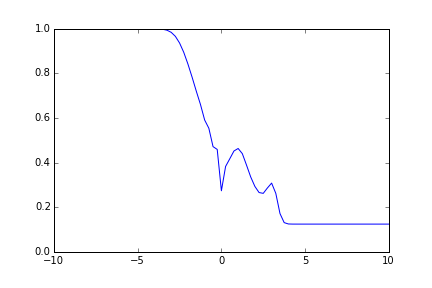
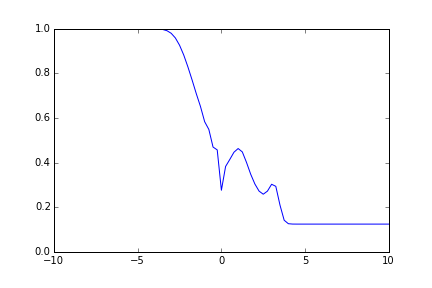
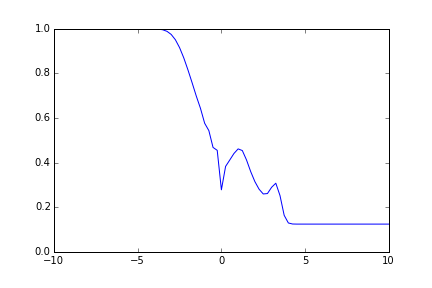
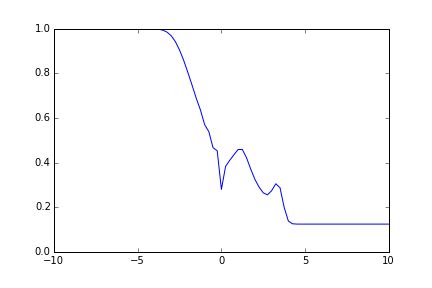
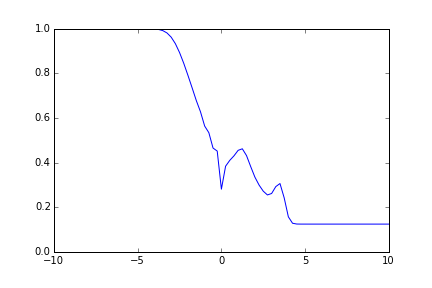
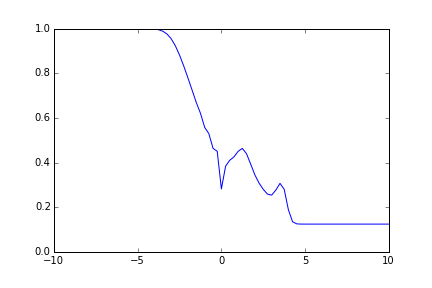
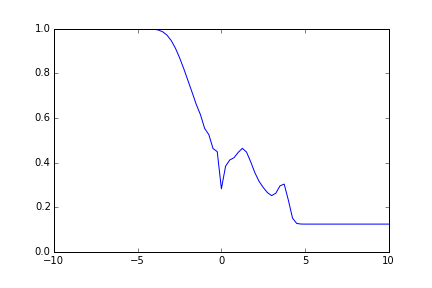
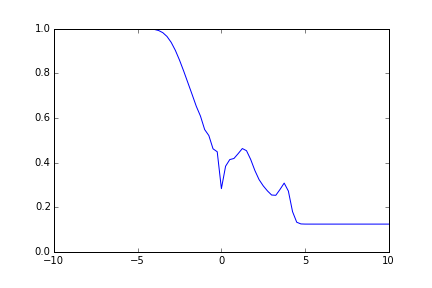
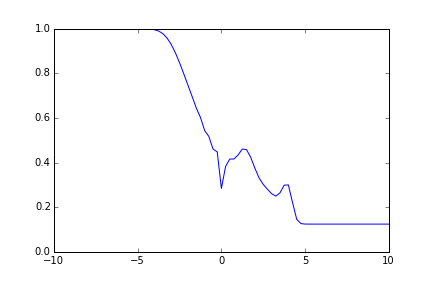
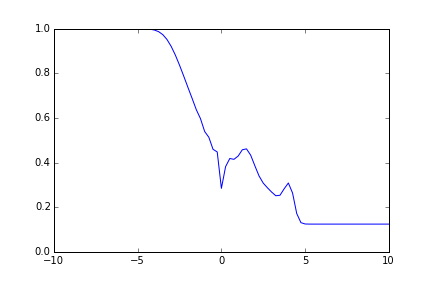
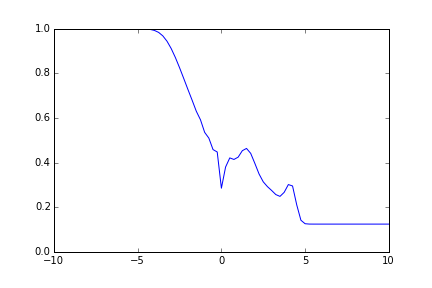
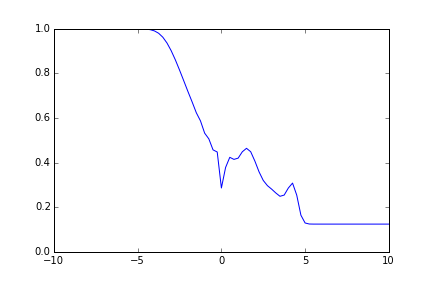
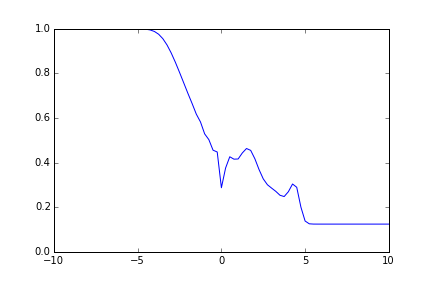
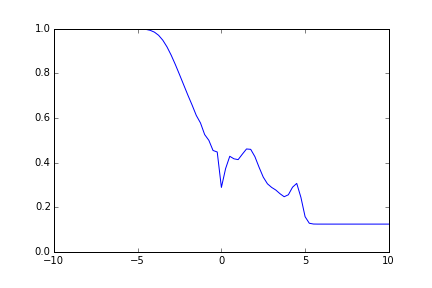
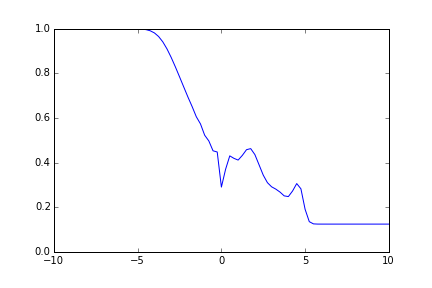
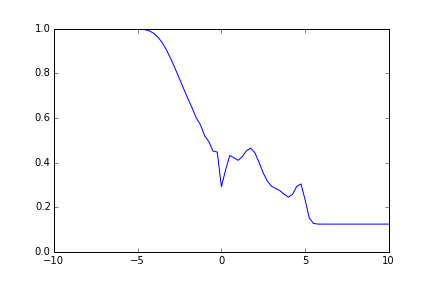
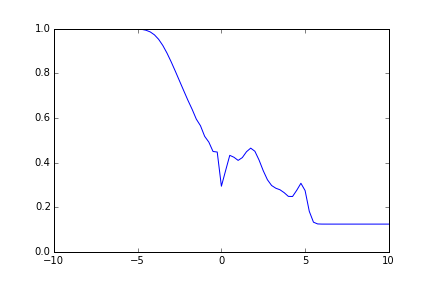

In [89]:
# Creation of the animation for density
fig = plt.figure()
ax = plt.axes(xlim=(-10,10), ylim=(0,1))
line = ax.plot([], [])[0]

def animate(data):
    x = npy.linspace(-10, 10, nx)
    y = data
    line.set_data(x,y)
    return line

anim.FuncAnimation(fig, animate, frames=u[:,:,0], interval=80)


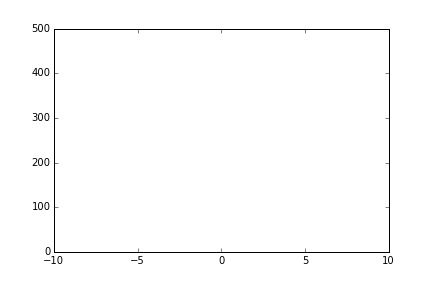
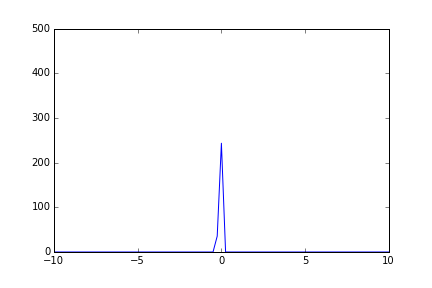
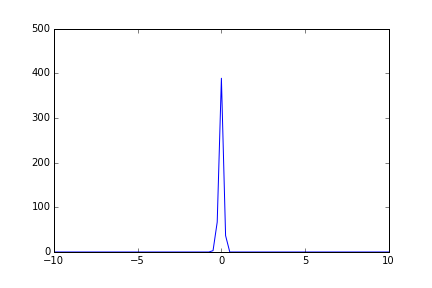
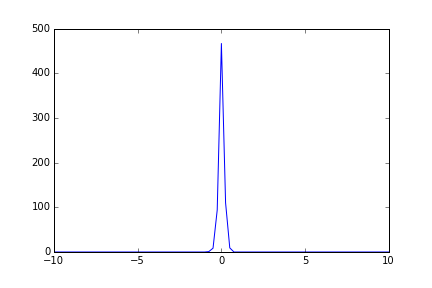
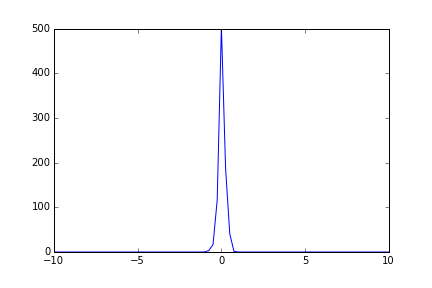
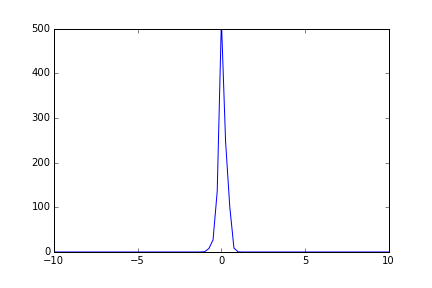
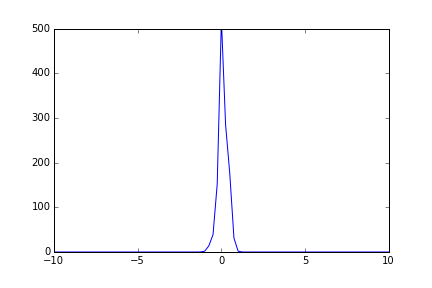
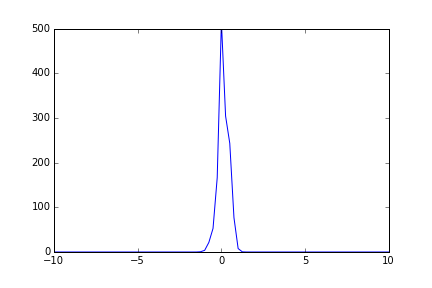
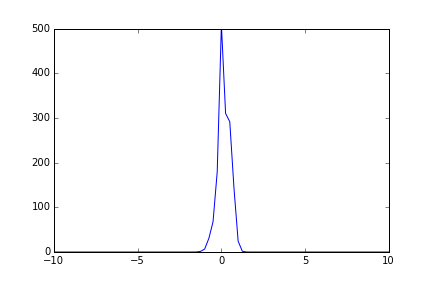
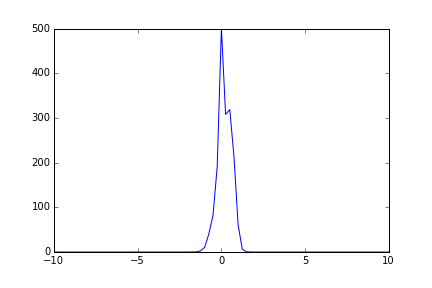
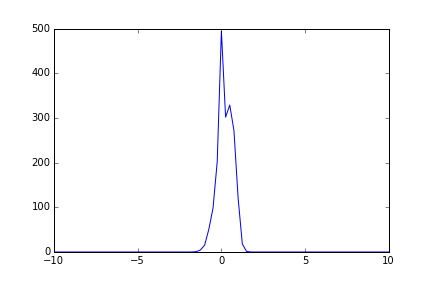
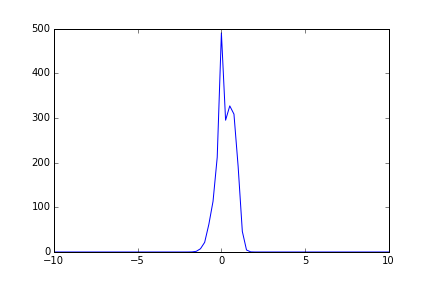
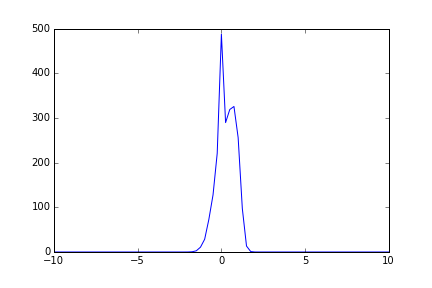
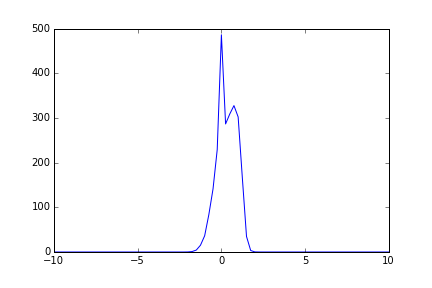
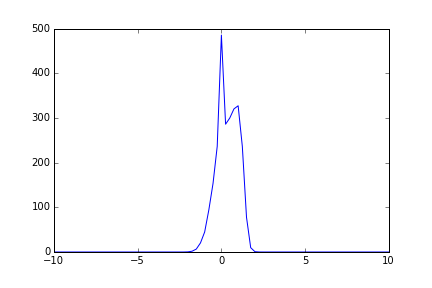
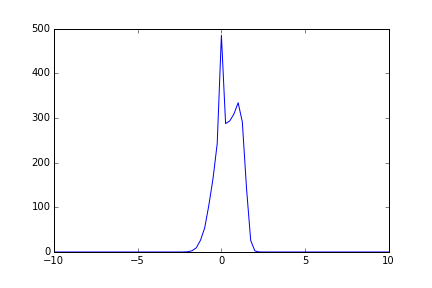
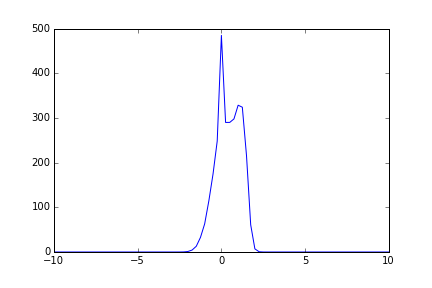
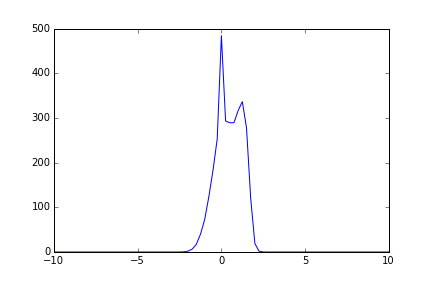
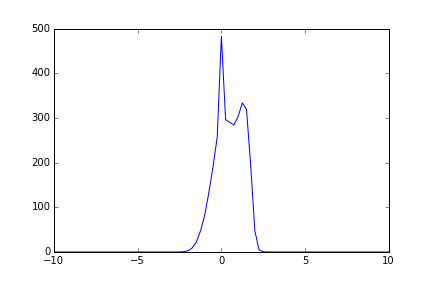
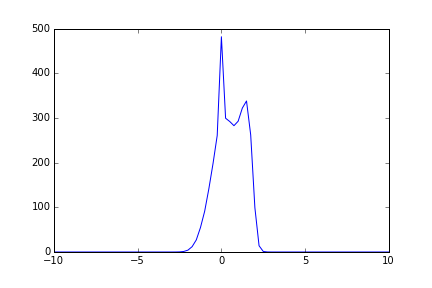
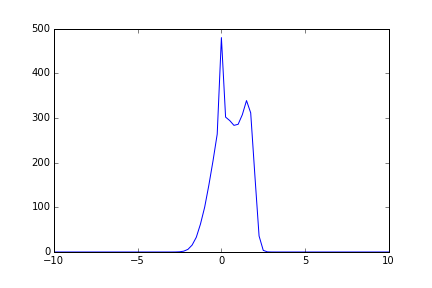
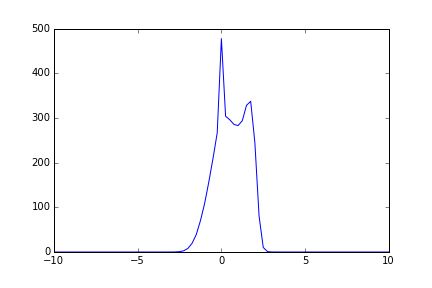
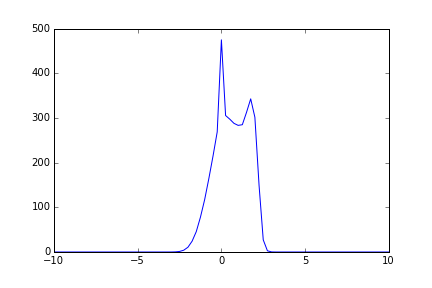
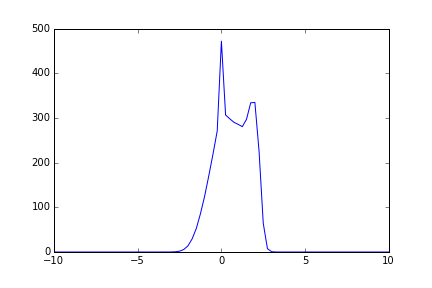
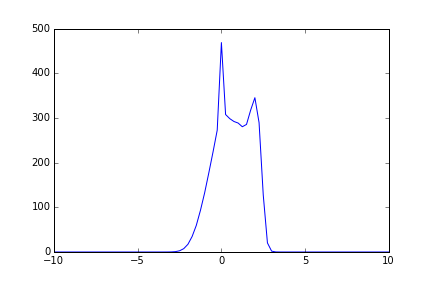
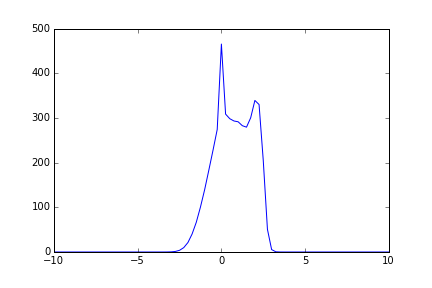
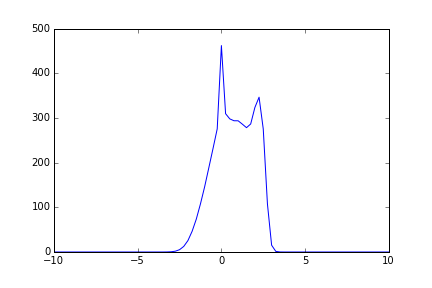
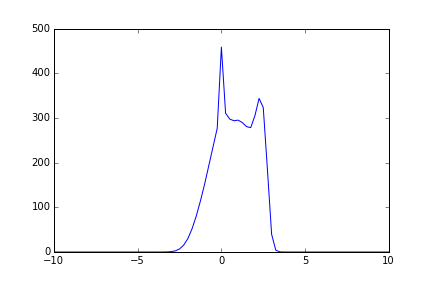
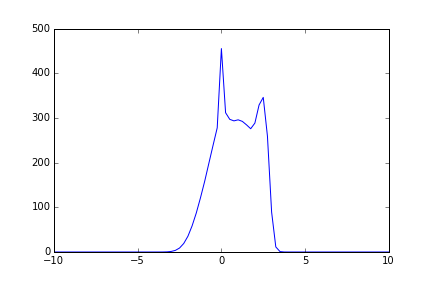
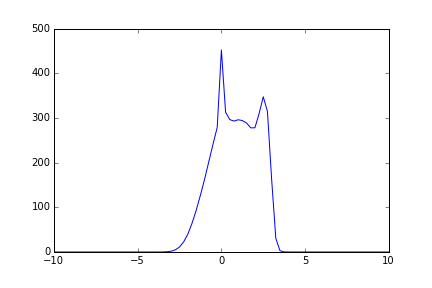
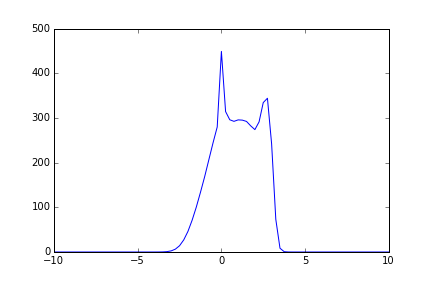
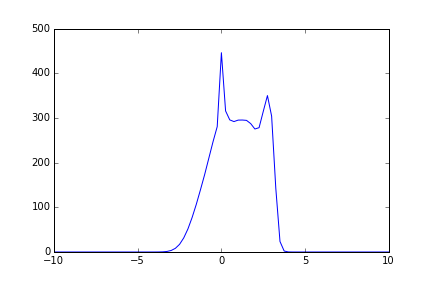
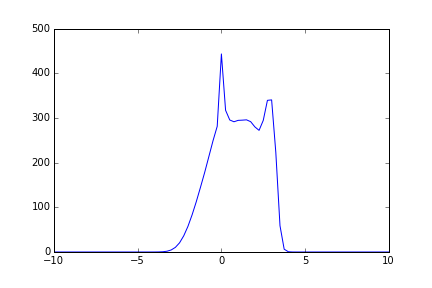
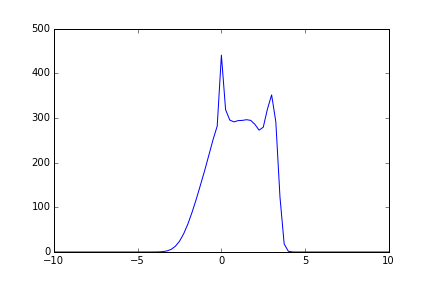
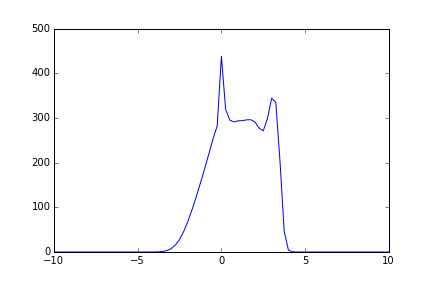
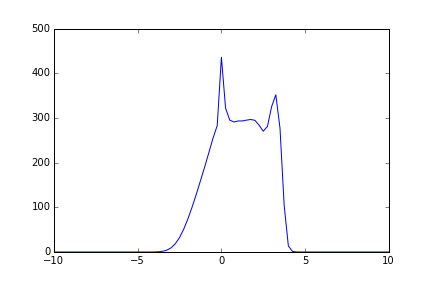
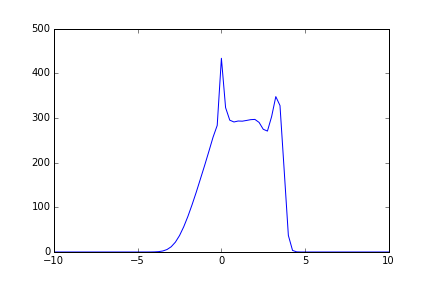
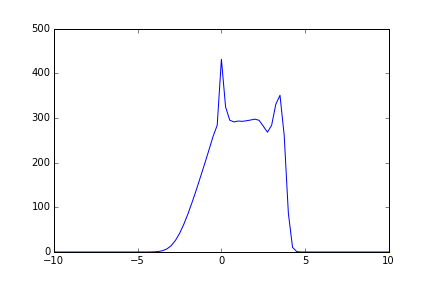
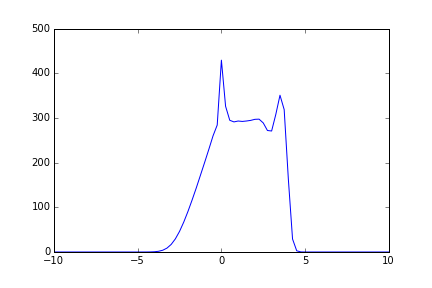
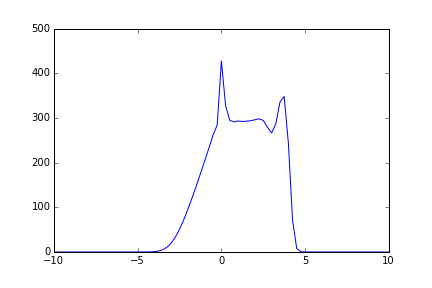
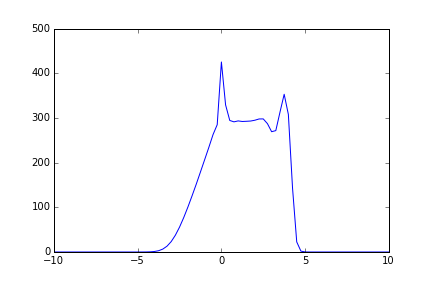
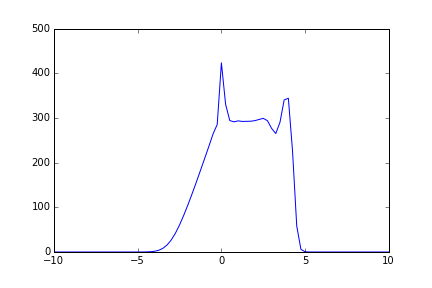
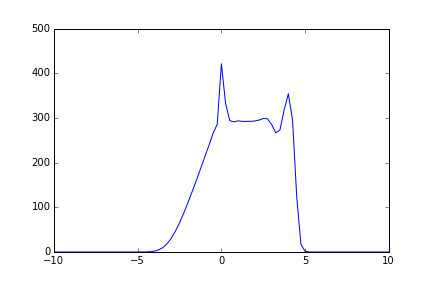
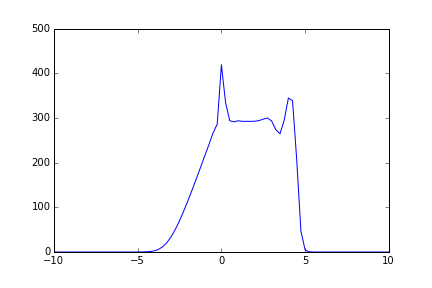
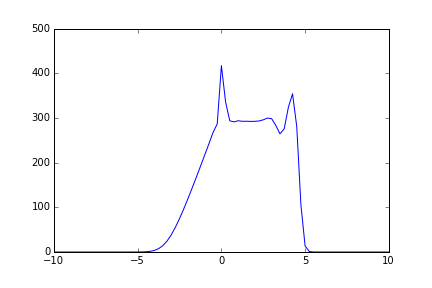
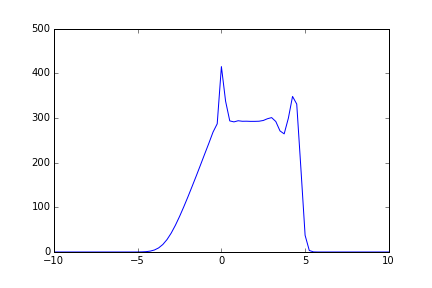
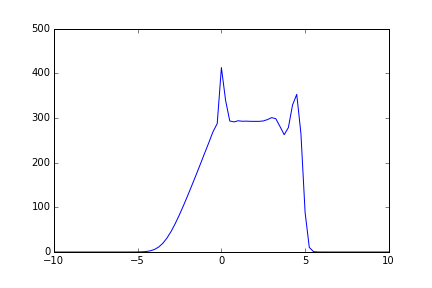
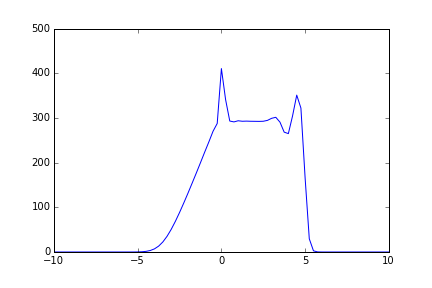
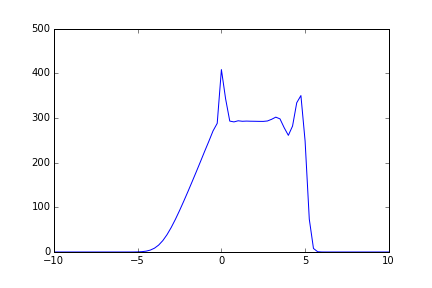
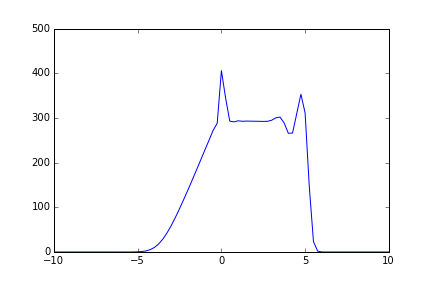

In [65]:
# Creation of the animation for speed
fig = plt.figure()
ax = plt.axes(xlim=(-10,10), ylim=(0,500))
line = ax.plot([], [])[0]

def animate(data):
    x = npy.linspace(-10, 10, nx)
    y = data
    line.set_data(x,y)
    return line

anim.FuncAnimation(fig, animate, frames=u[:,:,1]/u[:,:,0], interval=80)


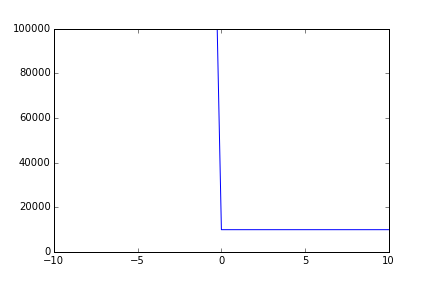
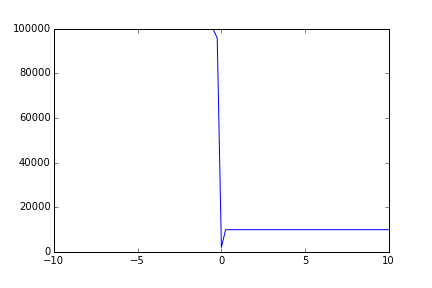
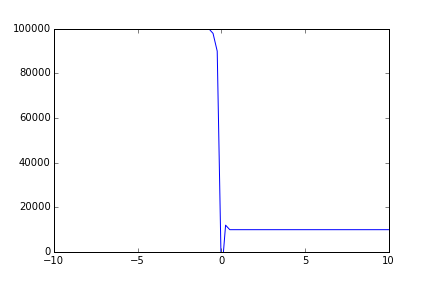
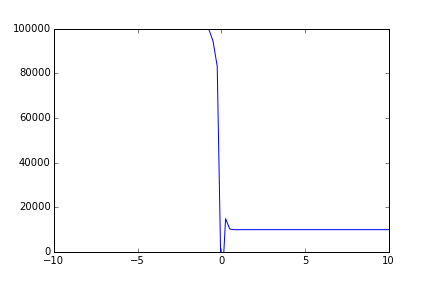
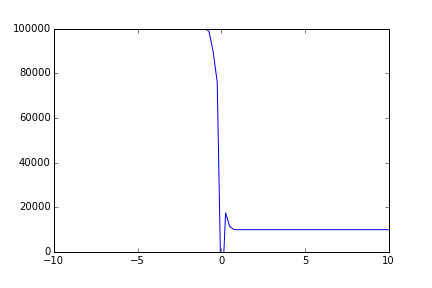
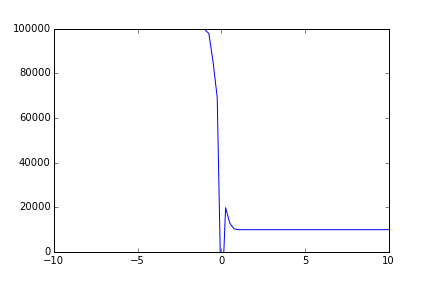
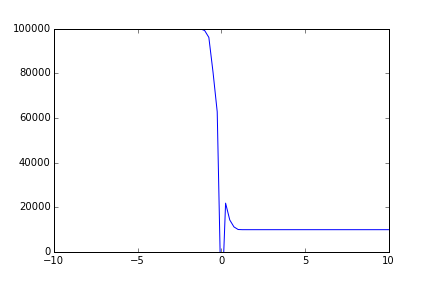
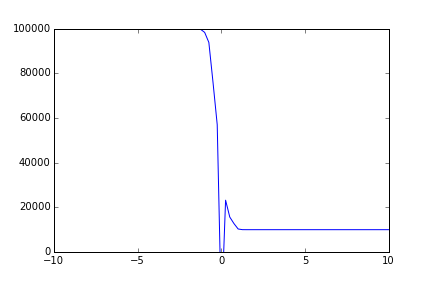
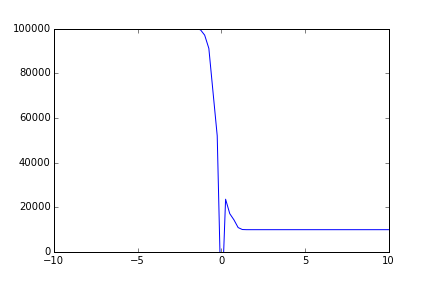
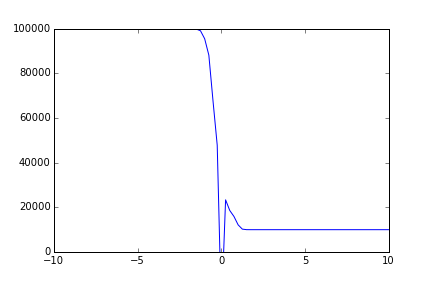
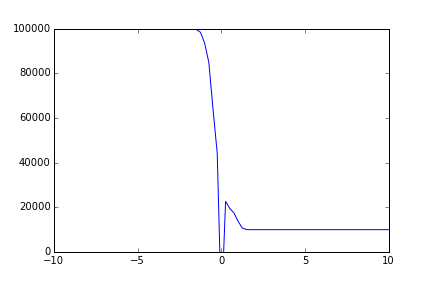
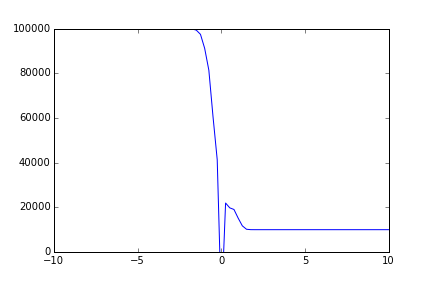
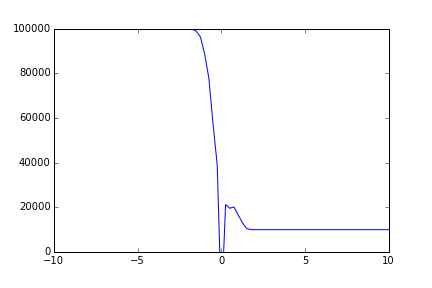
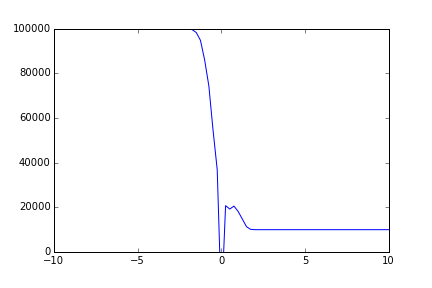
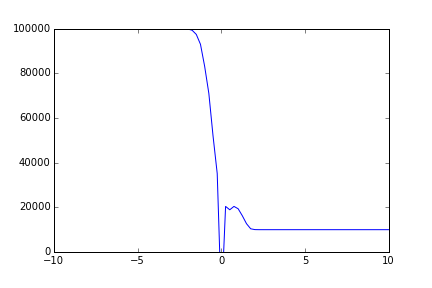
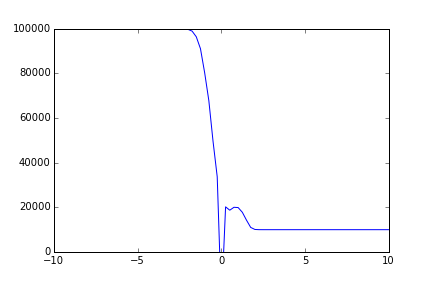
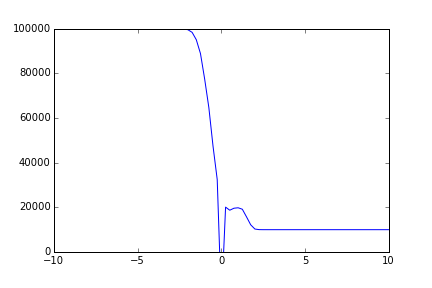
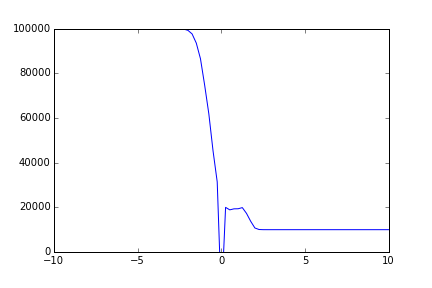
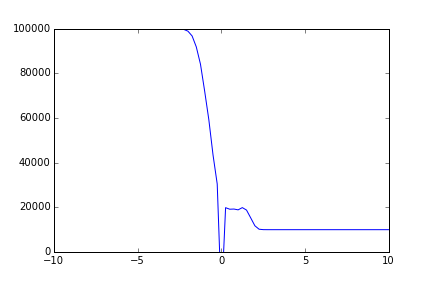
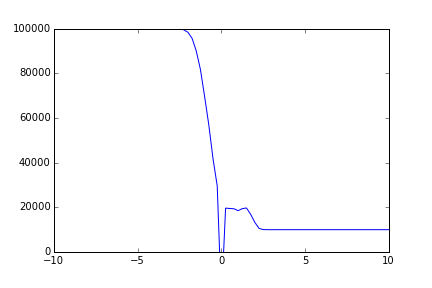
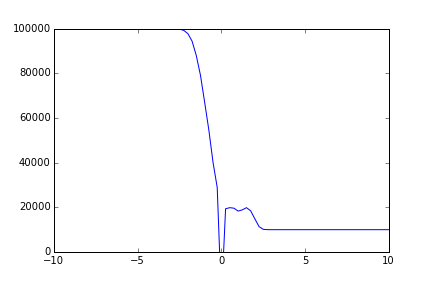
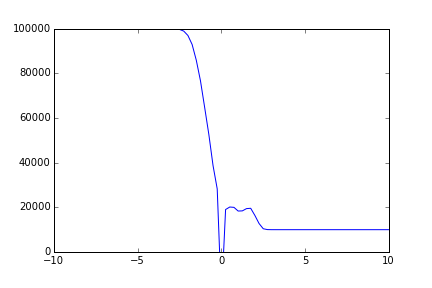
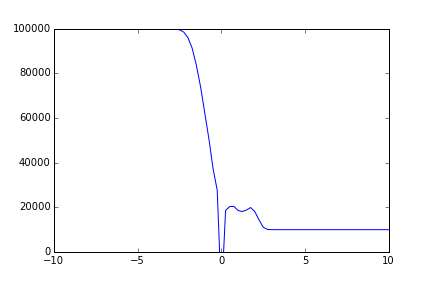
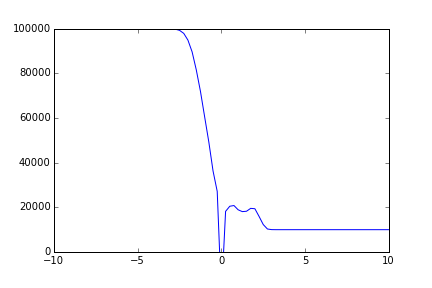
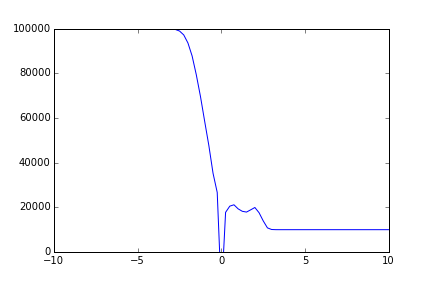
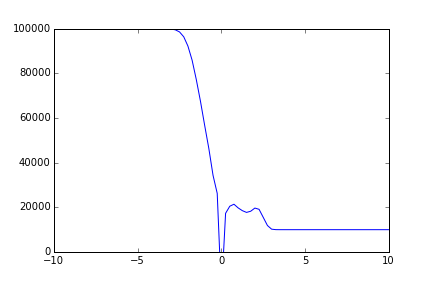
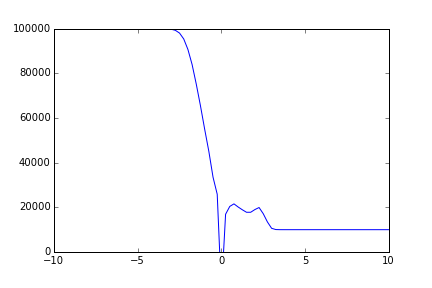
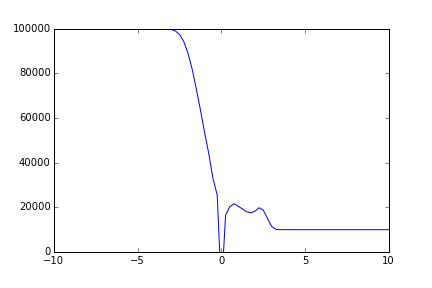
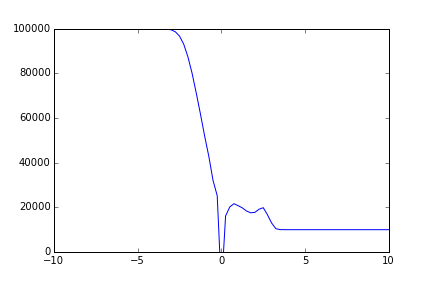
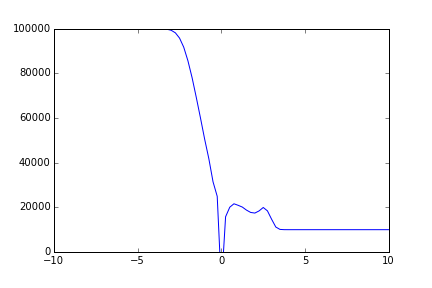
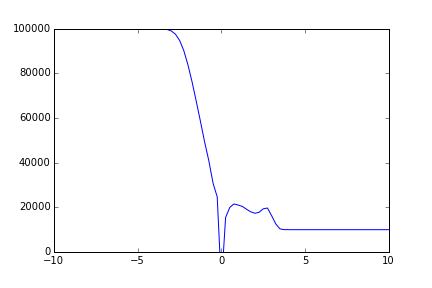
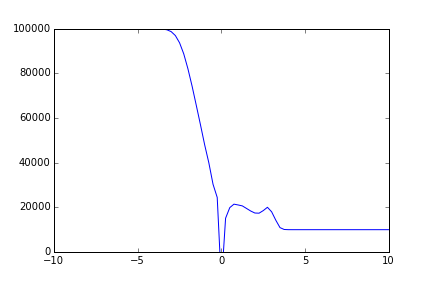
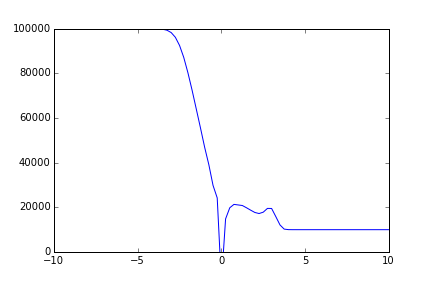
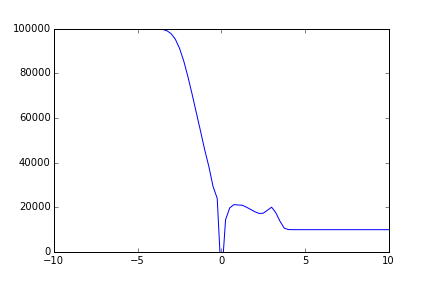
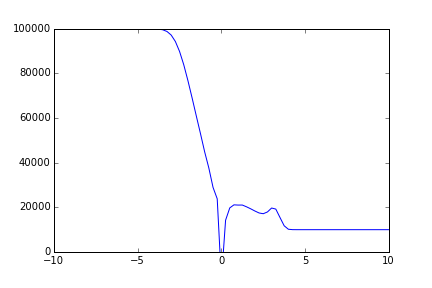
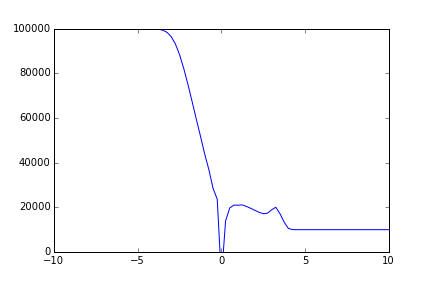
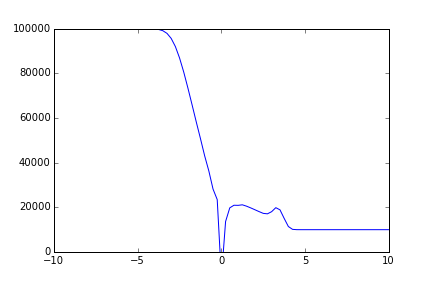
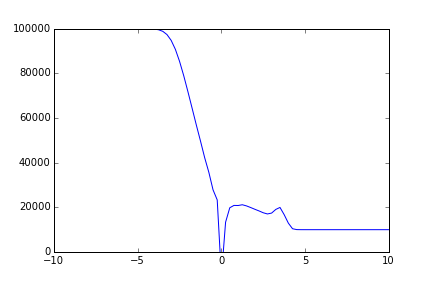
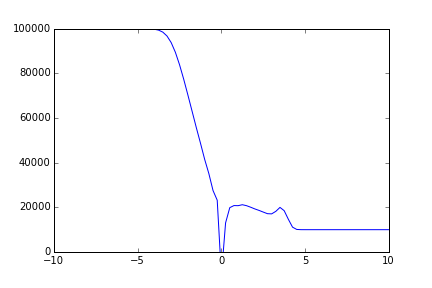
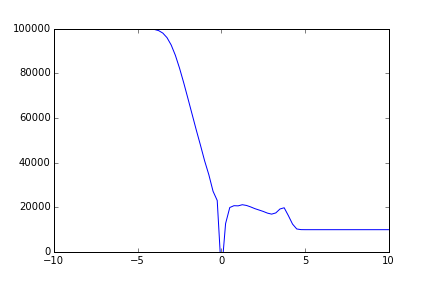
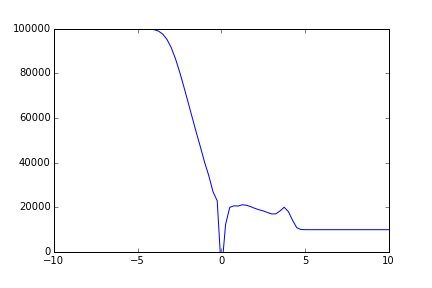
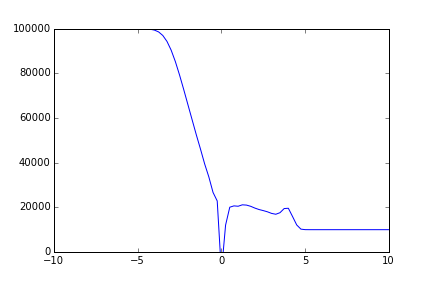
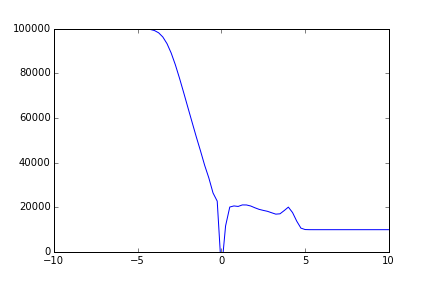
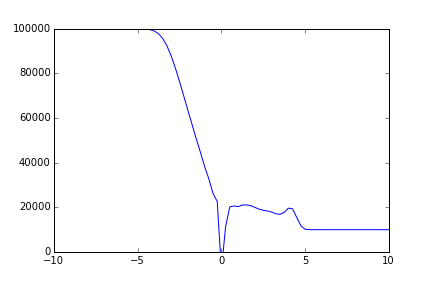
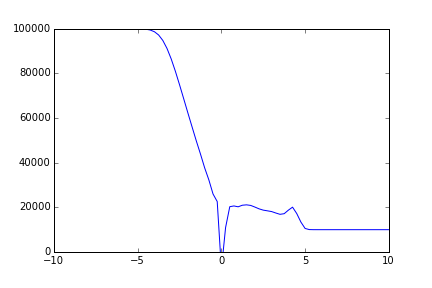
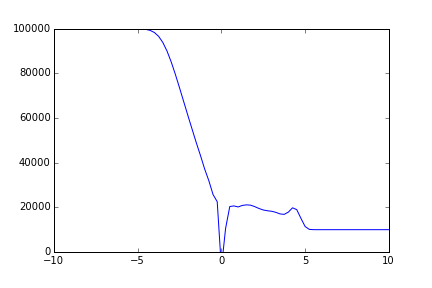
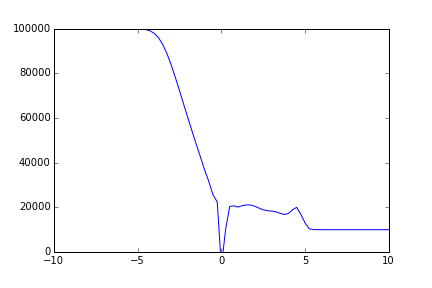
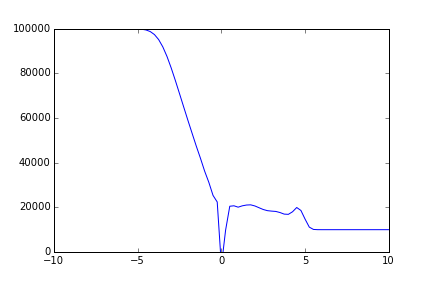
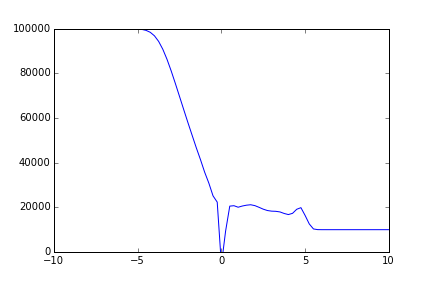
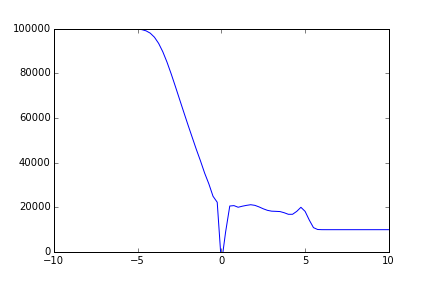

In [66]:
# Creation of the animation for pressure
fig = plt.figure()
ax = plt.axes(xlim=(-10,10), ylim=(0,100000))
line = ax.plot([], [])[0]

def animate(data):
    x = npy.linspace(-10, 10, nx)
    y = data
    line.set_data(x,y)
    return line

anim.FuncAnimation(fig, animate, frames=((u[:,:,2] - 0.5*(u[:,:,1]/u[:,:,0])**2)*(1.4 - 1)), interval=80)